In [165]:
import pandas as pd
import numpy as np
pd.options.display.max_columns
import scipy.stats as stats


# VIsualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline


#Prepocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler 
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler


from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


#Modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm


#Métricas
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.metrics import classification_report


#Validación Cruzada
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, ShuffleSplit

#Manejo de avisos de Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
datos = pd.read_excel("datos_VIC.xlsx")

In [3]:
datos.shape

(615709, 37)

>

>

 Re estructuración de los nombres de las variables, uso guines 
 bajos para eliminar los espacios y poder llamarlos más fácil.

In [4]:
datos.columns = [column.replace(' ', '_') for column in datos.columns]

In [5]:
datos.head(5)

id  ano_del_hecho sexo_de_la_victima grupo_de_edad_de_la_victima  \
0   1           2015             Hombre                   (10 a 14)   
1   2           2015             Hombre                   (00 a 04)   
2   3           2015             Hombre                   (00 a 04)   
3   4           2015             Hombre                   (00 a 04)   
4   5           2015             Hombre                   (25 a 29)   

       grupo_mayor_menor_de_edad edad_judicial                 ciclo_vital  \
0  a) Menores de Edad (<18 años)     (10 a 13)      (12 a 17) Adolescencia   
1  a) Menores de Edad (<18 años)     (00 a 04)  (00 a 05) Primera Infancia   
2  a) Menores de Edad (<18 años)     (00 a 04)  (00 a 05) Primera Infancia   
3  a) Menores de Edad (<18 años)     (00 a 04)  (00 a 05) Primera Infancia   
4  b) Mayores de Edad (>18 años)     (25 a 28)          (18 a 28) Juventud   

  pais_de_nacimiento_de_la_victima                escolaridad estado_civil  \
0                         Colombia  Educación básica primaria  Soltero (a)   
1                         Colombia            Sin escolaridad    No aplica   
2                         Colombia            Sin escolaridad    No aplica   
3                         Colombia            Sin escolaridad    No aplica   
4                         Colombia            Sin información  Unión libre   

   ... diagnostico_topografico_de_la_lesion sexo_del_presunto_agresor  \
0  ...                   Trauma de miembros                    Hombre   
1  ...                   Trauma de miembros                     Mujer   
2  ...                      Sin información                     Mujer   
3  ...                        Trauma facial                     Mujer   
4  ...                        Trauma facial                    Hombre   

                           presunto_agresor condicion_de_la_victima  \
0                                     Padre               No aplica   
1                                     Madre               No aplica   
2  Otros familiares civiles o consanguíneos               No aplica   
3                                Abuelo (a)               No aplica   
4                               Hermano (a)               No aplica   

  medio_de_desplazamiento_o_transporte servicio_del_vehiculo  \
0                            No aplica             No aplica   
1                            No aplica             No aplica   
2                            No aplica             No aplica   
3                            No aplica             No aplica   
4                            No aplica             No aplica   

   clase_o_tipo_de_accidente objeto_de_colision  \
0                  No aplica          No aplica   
1                  No aplica          No aplica   
2                  No aplica          No aplica   
3                  No aplica          No aplica   
4                  No aplica          No aplica   

  servicio_del_objeto_de_colision  días_de_incapacidad_medicolegal  
0                       No aplica                           1 a 30  
1                       No aplica                           1 a 30  
2                       No aplica                  Sin información  
3                       No aplica                           1 a 30  
4                       No aplica                           1 a 30  

[5 rows x 37 columns]

>

>

>

realizao un conteo de los valores contenidos en cada variable de la base de datos para identificar variables que no cuentan con datos  o tiene datos insuficientes para así considerar si el descarte de variables.

se identifican 6 variables que no cuentan con datos, son las siguientes

CONDICION_DE_LA_VICTIMA

MEDIO_DE_DESPLAZAMIENTO_O_TRANSPORTE

SERVICIO_DEL_VEHICULO

CLASE_O_TIPO_DE_ACCIDENTE

OBJETO_DE_COLISION

SERVICIO_DEL_OBJETO_DE_COLISION


Existen 5 filas con datos denominados  "Por Determianr", se revisan si contiene información útil que pueda afectar el estudio en caso de eliminarce, una vez revisadas se determina que estas filas pueden ser eliminadas.

In [6]:
for i in datos:
    print("-------------------------")
    print(f"-----------<{i.upper()}>-------------")
    print(datos[i].value_counts())
 

-------------------------
-----------<ID>-------------
1         1
410453    1
410455    1
410456    1
410457    1
         ..
205211    1
205212    1
205213    1
205214    1
615709    1
Name: id, Length: 615709, dtype: int64
-------------------------
-----------<ANO_DEL_HECHO>-------------
2018    78314
2017    77610
2019    77303
2016    77180
2015    74233
2023    68403
2022    62476
2021    53008
2020    47182
Name: ano_del_hecho, dtype: int64
-------------------------
-----------<SEXO_DE_LA_VICTIMA>-------------
Mujer     473621
Hombre    142088
Name: sexo_de_la_victima, dtype: int64
-------------------------
-----------<GRUPO_DE_EDAD_DE_LA_VICTIMA>-------------
(25 a 29)         105476
(20 a 24)          96571
(30 a 34)          88951
(35 a 39)          67230
(40 a 44)          46820
(45 a 49)          32347
(10 a 14)          27412
(15 a 17)          27083
(18 a 19)          25383
(50 a 54)          24499
(05 a 09)          19303
(55 a 59)          17154
(00 a 04)          12301

In [7]:
datos.drop(columns=['condicion_de_la_victima',
       'medio_de_desplazamiento_o_transporte', 'servicio_del_vehiculo',
       'clase_o_tipo_de_accidente', 'objeto_de_colision',
       'servicio_del_objeto_de_colision'], inplace=True, axis=1)

In [8]:
datos.drop(datos[datos["grupo_de_edad_de_la_victima"] == "Por determinar"].index, inplace=True)

In [9]:
datos.shape

(615704, 31)

In [136]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615704 entries, 0 to 615708
Data columns (total 31 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   id                                    615704 non-null  int64 
 1   ano_del_hecho                         615704 non-null  int64 
 2   sexo_de_la_victima                    615704 non-null  object
 3   grupo_de_edad_de_la_victima           615704 non-null  object
 4   grupo_mayor_menor_de_edad             615704 non-null  object
 5   edad_judicial                         615704 non-null  object
 6   ciclo_vital                           615704 non-null  object
 7   pais_de_nacimiento_de_la_victima      615704 non-null  object
 8   escolaridad                           615704 non-null  object
 9   estado_civil                          615704 non-null  object
 10  tipo_de_discapacidad                  615704 non-null  object
 11  pertenencia_e

# EDA inicial sin codificación de variables

In [85]:
from ydata_profiling import ProfileReport

In [86]:
profile = ProfileReport(datos, title="Informe de Análisis Exploratorio")

In [88]:
profile.to_notebook_iframe()

Primeros hallazgos con el EDA:

Variable - Sexo de la Víctima:

Se evidencia que los crimenes de Violencia Intrafamiliar recaen más fuertemente sobre Mujeres con un 76%
con respecto a los hombres que reprecentan un 23%

De ese 76% de las mujeres el 68% corresponden a mujeres mayores de edad y un 8% corresponde a mujeres menores de edad

En el caso de los Hombres de ese 23% el 17% son mayores de edad y solo un 5% corresponde a niños (menores de edad)


Variable - Grado de Escolaridad


El grado de escolaridad tiene un marcado impacto en los niveles de Violencia intrafamiliar en las mujeres, 
entre mayor sea el nivel educativo menos tasas de violencia se presentan, asi mismo sucede en el segmento de los hombres


In [225]:
datos["sexo_de_la_victima"].value_counts(normalize=True)

Mujer     0.769227
Hombre    0.230773
Name: sexo_de_la_victima, dtype: float64

<AxesSubplot:>

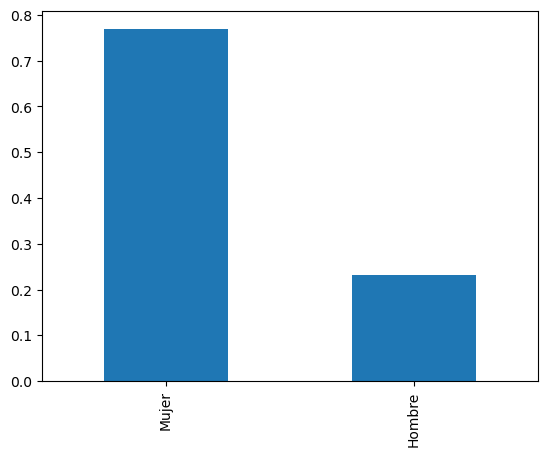

In [236]:
datos["sexo_de_la_victima"].value_counts(normalize=True).plot(kind="bar")

In [233]:
dis_por_edad = datos[["sexo_de_la_victima" ,"grupo_mayor_menor_de_edad"]]
dis_por_edad.value_counts(normalize=True)

sexo_de_la_victima  grupo_mayor_menor_de_edad    
Mujer               b) Mayores de Edad (>18 años)    0.688690
Hombre              b) Mayores de Edad (>18 años)    0.171474
Mujer               a) Menores de Edad (<18 años)    0.080537
Hombre              a) Menores de Edad (<18 años)    0.059300
dtype: float64

<AxesSubplot:xlabel='sexo_de_la_victima,grupo_mayor_menor_de_edad'>

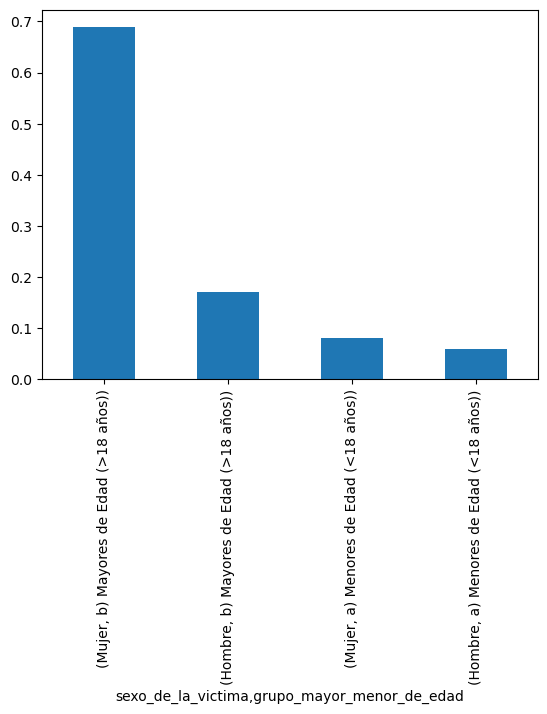

In [249]:
dis_por_edad = datos[["sexo_de_la_victima" ,"grupo_mayor_menor_de_edad"]]
dis_por_edad.value_counts(normalize=True).plot(kind="bar")

In [245]:
escolaridad = datos[["sexo_de_la_victima" ,"escolaridad"]]
escolaridad_mujeres = escolaridad[escolaridad["sexo_de_la_victima"]=="Mujer"]
escolaridad_mujeres.value_counts(normalize=True)

sexo_de_la_victima  escolaridad                                  
Mujer               Educación básica primaria                        0.240207
                    Educación media o secundaria alta                0.236719
                    Educación básica secundaria o secundaria baja    0.236483
                    Educación técnica profesional y tecnológica      0.160434
                    Educación inicial y educación preescolar         0.085998
                    Sin escolaridad                                  0.019792
                    Sin información                                  0.013688
                    Universitario                                    0.004765
                    Especialización, Maestría o equivalente          0.001007
                    Especialización, maestría o equivalente          0.000587
                    Doctorado o equivalente                          0.000319
dtype: float64

<AxesSubplot:xlabel='sexo_de_la_victima,escolaridad'>

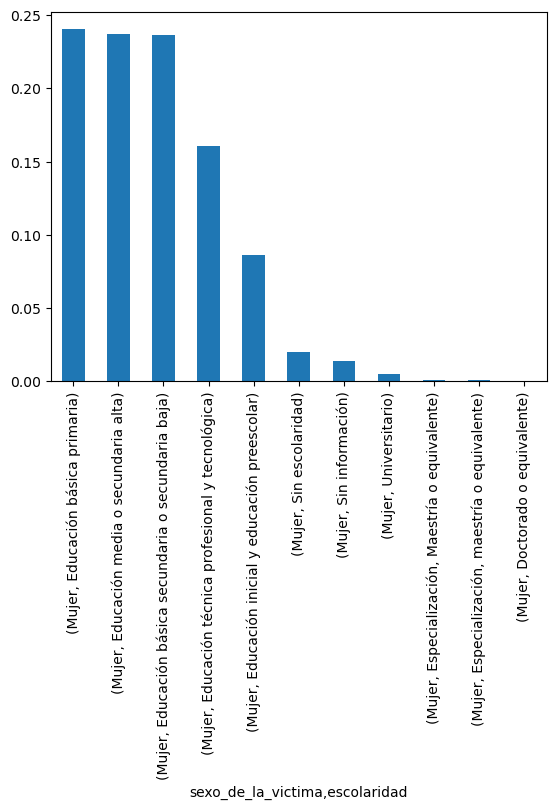

In [246]:
escolaridad_mujeres.value_counts(normalize=True).plot(kind="bar")

In [250]:
escolaridad = datos[["sexo_de_la_victima" ,"escolaridad"]]
escolaridad_hombres = escolaridad[escolaridad["sexo_de_la_victima"]=="Hombre"]
escolaridad_hombres.value_counts(normalize=True)

sexo_de_la_victima  escolaridad                                  
Hombre              Educación básica primaria                        0.278018
                    Educación básica secundaria o secundaria baja    0.187257
                    Educación inicial y educación preescolar         0.173343
                    Educación media o secundaria alta                0.168297
                    Educación técnica profesional y tecnológica      0.107208
                    Sin escolaridad                                  0.056500
                    Sin información                                  0.022521
                    Universitario                                    0.004807
                    Especialización, Maestría o equivalente          0.001168
                    Especialización, maestría o equivalente          0.000626
                    Doctorado o equivalente                          0.000253
dtype: float64

<AxesSubplot:xlabel='sexo_de_la_victima,escolaridad'>

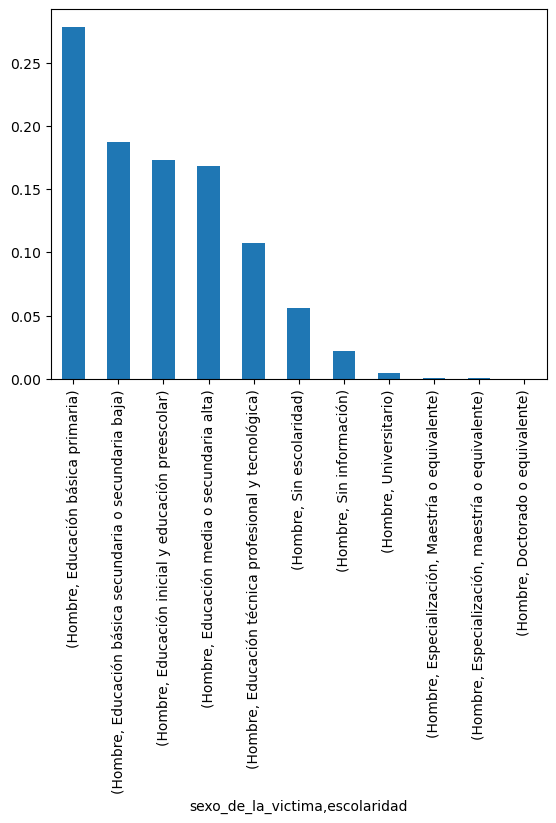

In [251]:
escolaridad_hombres.value_counts(normalize=True).plot(kind="bar")

In [166]:
datos.head()

id  ano_del_hecho sexo_de_la_victima grupo_de_edad_de_la_victima  \
0   1           2015             Hombre                   (10 a 14)   
1   2           2015             Hombre                   (00 a 04)   
2   3           2015             Hombre                   (00 a 04)   
3   4           2015             Hombre                   (00 a 04)   
4   5           2015             Hombre                   (25 a 29)   

       grupo_mayor_menor_de_edad edad_judicial                 ciclo_vital  \
0  a) Menores de Edad (<18 años)     (10 a 13)      (12 a 17) Adolescencia   
1  a) Menores de Edad (<18 años)     (00 a 04)  (00 a 05) Primera Infancia   
2  a) Menores de Edad (<18 años)     (00 a 04)  (00 a 05) Primera Infancia   
3  a) Menores de Edad (<18 años)     (00 a 04)  (00 a 05) Primera Infancia   
4  b) Mayores de Edad (>18 años)     (25 a 28)          (18 a 28) Juventud   

  pais_de_nacimiento_de_la_victima                escolaridad estado_civil  \
0                         Colombia  Educación básica primaria  Soltero (a)   
1                         Colombia            Sin escolaridad    No aplica   
2                         Colombia            Sin escolaridad    No aplica   
3                         Colombia            Sin escolaridad    No aplica   
4                         Colombia            Sin información  Unión libre   

   ...      zona_del_hecho                              escenario_del_hecho  \
0  ...  Cabecera municipal  Calle (autopista, avenida, dentro de la ciudad)   
1  ...  Cabecera municipal                                         Vivienda   
2  ...  Cabecera municipal                                  Sin Información   
3  ...  Cabecera municipal                                         Vivienda   
4  ...  Cabecera municipal  Calle (autopista, avenida, dentro de la ciudad)   

                          actividad_durante_el_hecho  \
0   Actividades de desplazamiento de un lugar a otro   
1  Actividades relacionadas con la asistencia a e...   
2   Actividades de desplazamiento de un lugar a otro   
3   Actividades de desplazamiento de un lugar a otro   
4   Actividades de desplazamiento de un lugar a otro   

                   circunstancia_del_hecho  \
0  Violencia a niños, niñas y adolescentes   
1  Violencia a niños, niñas y adolescentes   
2  Violencia a niños, niñas y adolescentes   
3  Violencia a niños, niñas y adolescentes   
4         Violencia entre otros familiares   

                               contexto_de_violencia mecanismo_causal  \
0  Violencia Contra Niños, Niñas y Adolescentes (...         Abrasivo   
1  Violencia Contra Niños, Niñas y Adolescentes (...      Contundente   
2  Violencia Contra Niños, Niñas y Adolescentes (...   Por determinar   
3  Violencia Contra Niños, Niñas y Adolescentes (...      Contundente   
4             Violencia Entre Otros Familiares (VIF)      Contundente   

   diagnostico_topografico_de_la_lesion sexo_del_presunto_agresor  \
0                    Trauma de miembros                    Hombre   
1                    Trauma de miembros                     Mujer   
2                       Sin información                     Mujer   
3                         Trauma facial                     Mujer   
4                         Trauma facial                    Hombre   

                           presunto_agresor  días_de_incapacidad_medicolegal  
0                                     Padre                           1 a 30  
1                                     Madre                           1 a 30  
2  Otros familiares civiles o consanguíneos                  Sin información  
3                                Abuelo (a)                           1 a 30  
4                               Hermano (a)                           1 a 30  

[5 rows x 31 columns]

>

>

>

>

>

>

>

Función para limpieza y promedio de datos "Edad Judicial"

Apliqué la función y noté que me daba un problema, al verificar encontre que exite un dato que no tuve en cuenta
previamente y que no permite realizar el calculo, el dato (80 y más)

In [216]:
def promediar_edad(serie):
    
    """
    La función limpia las series de datos
    que estan representadas en rangos de edad que
    estan como tipo de dato String.
    """
    datos_strip = serie.str.replace("(80 y más)", "(80 a 84)").str.strip("()")
    datos_split = datos_strip.str.split("a")
    datos_promedio = datos_split.apply(lambda x: (int(x[0]) + int(x[1])) / 2) #Esta linea de codigo la tuve que sacar con AI Gemini de Google
    return datos_promedio

>

Convierto los rangos de edad a promedios de edad con la función.

In [222]:
datos["edad_judicial_promedio"] = promediar_edad(datos["edad_judicial"])

In [224]:
datos.head()

id  ano_del_hecho sexo_de_la_victima grupo_de_edad_de_la_victima  \
0   1           2015             Hombre                   (10 a 14)   
1   2           2015             Hombre                   (00 a 04)   
2   3           2015             Hombre                   (00 a 04)   
3   4           2015             Hombre                   (00 a 04)   
4   5           2015             Hombre                   (25 a 29)   

       grupo_mayor_menor_de_edad edad_judicial                 ciclo_vital  \
0  a) Menores de Edad (<18 años)     (10 a 13)      (12 a 17) Adolescencia   
1  a) Menores de Edad (<18 años)     (00 a 04)  (00 a 05) Primera Infancia   
2  a) Menores de Edad (<18 años)     (00 a 04)  (00 a 05) Primera Infancia   
3  a) Menores de Edad (<18 años)     (00 a 04)  (00 a 05) Primera Infancia   
4  b) Mayores de Edad (>18 años)     (25 a 28)          (18 a 28) Juventud   

  pais_de_nacimiento_de_la_victima                escolaridad estado_civil  \
0                         Colombia  Educación básica primaria  Soltero (a)   
1                         Colombia            Sin escolaridad    No aplica   
2                         Colombia            Sin escolaridad    No aplica   
3                         Colombia            Sin escolaridad    No aplica   
4                         Colombia            Sin información  Unión libre   

   ...                         actividad_durante_el_hecho  \
0  ...   Actividades de desplazamiento de un lugar a otro   
1  ...  Actividades relacionadas con la asistencia a e...   
2  ...   Actividades de desplazamiento de un lugar a otro   
3  ...   Actividades de desplazamiento de un lugar a otro   
4  ...   Actividades de desplazamiento de un lugar a otro   

                   circunstancia_del_hecho  \
0  Violencia a niños, niñas y adolescentes   
1  Violencia a niños, niñas y adolescentes   
2  Violencia a niños, niñas y adolescentes   
3  Violencia a niños, niñas y adolescentes   
4         Violencia entre otros familiares   

                               contexto_de_violencia mecanismo_causal  \
0  Violencia Contra Niños, Niñas y Adolescentes (...         Abrasivo   
1  Violencia Contra Niños, Niñas y Adolescentes (...      Contundente   
2  Violencia Contra Niños, Niñas y Adolescentes (...   Por determinar   
3  Violencia Contra Niños, Niñas y Adolescentes (...      Contundente   
4             Violencia Entre Otros Familiares (VIF)      Contundente   

  diagnostico_topografico_de_la_lesion sexo_del_presunto_agresor  \
0                   Trauma de miembros                    Hombre   
1                   Trauma de miembros                     Mujer   
2                      Sin información                     Mujer   
3                        Trauma facial                     Mujer   
4                        Trauma facial                    Hombre   

                           presunto_agresor días_de_incapacidad_medicolegal  \
0                                     Padre                          1 a 30   
1                                     Madre                          1 a 30   
2  Otros familiares civiles o consanguíneos                 Sin información   
3                                Abuelo (a)                          1 a 30   
4                               Hermano (a)                          1 a 30   

  new_col  edad_judicial_promedio  
0    11.5                    11.5  
1     2.0                     2.0  
2     2.0                     2.0  
3     2.0                     2.0  
4    26.5                    26.5  

[5 rows x 33 columns]